<a href="https://colab.research.google.com/github/bryanMontoya/ml/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb

%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

path = 'drive/MyDrive/ML-Modelos/data/'
dataframe = pd.read_csv(path + 'reviews_sentiment.csv' , sep = ';')
dataframe.head(10)


,Review Title,Review Text,wordcount,titleSentiment,textSentiment,Star Rating,sentimentValue
0,Sin conexión,Hola desde hace algo más de un mes me pone sin...,23,negative,negative,1,-0.486389
1,faltan cosas,Han mejorado la apariencia pero no,20,negative,negative,1,-0.586187
2,Es muy buena lo recomiendo,Andres e puto amoooo,4,NaN,negative,1,-0.602240
3,Version antigua,Me gustana mas la version anterior esta es mas...,17,NaN,negative,1,-0.616271
4,Esta bien,Sin ser la biblia.... Esta bien,6,negative,negative,1,-0.651784
5,Buena,Nada del otro mundo pero han mejorado mucho,8,positive,negative,1,-0.720443
6,De gran ayuda,"Lo malo q necesita de …,pero la app es muy buena",23,positive,negative,1,-0.726825
7,Muy buena,"Estaba más acostumbrado al otro diseño, pero e...",16,positive,negative,1,-0.736769
8,Ta to guapa.,Va de escándalo,21,positive,negative,1,-0.765284
9,Se han corregido,Han corregido muchos fallos pero el diseño es ...,13,negative,negative,1,-0.797961


In [ ]:
#Clasificacion multiclase.
#Mediana: Donde los datos se dividen a la mitad. 50%
dataframe.describe()

,wordcount,Star Rating,sentimentValue
count,257.000000,257.000000,257.000000
mean,11.501946,3.420233,0.383849
std,13.159812,1.409531,0.897987
min,1.000000,1.000000,-2.276469
25%,3.000000,3.000000,-0.108144
50%,7.000000,3.000000,0.264091
75%,16.000000,5.000000,0.808384
max,103.000000,5.000000,3.264579


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f92b6532850>,
      dtype=object)

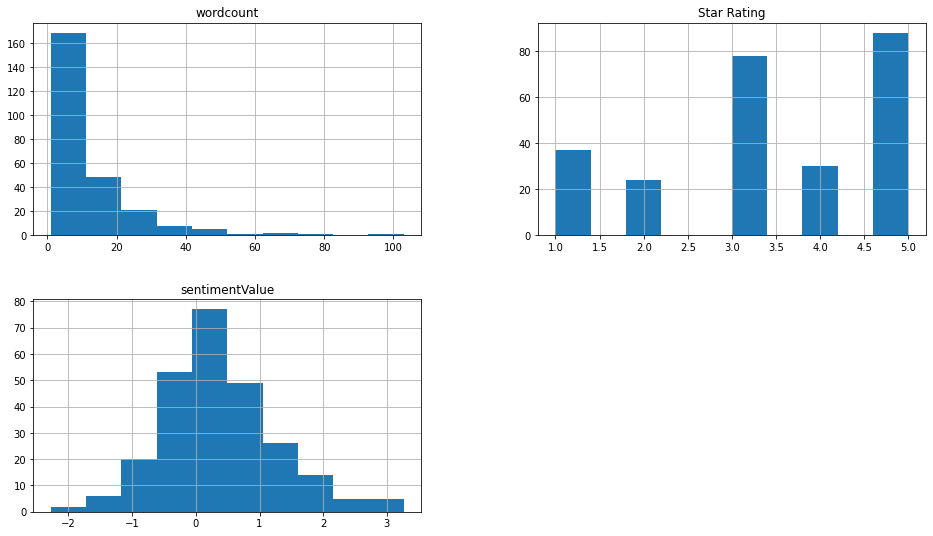

In [ ]:
dataframe.hist(figsize = (16,9))

In [ ]:
print(dataframe.groupby('Star Rating').size())

Star Rating
1    37
2    24
3    78
4    30
5    88
dtype: int64


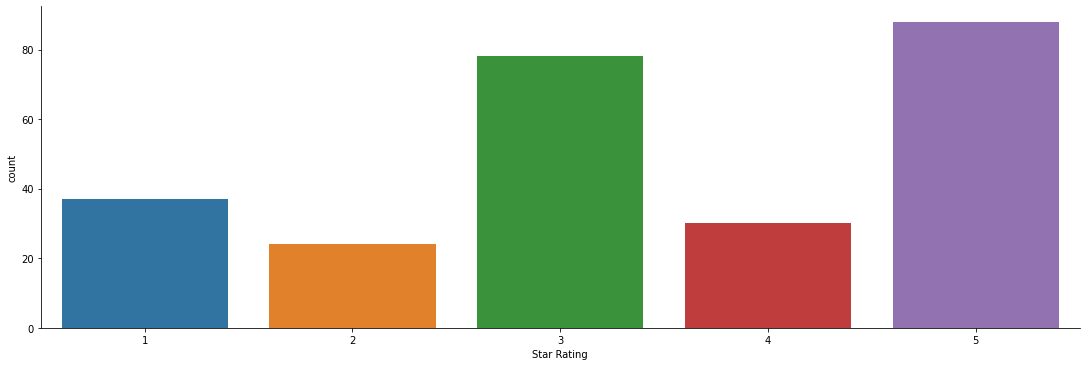

In [ ]:
sb.catplot(x = 'Star Rating', data = dataframe, kind = 'count', aspect = 3);

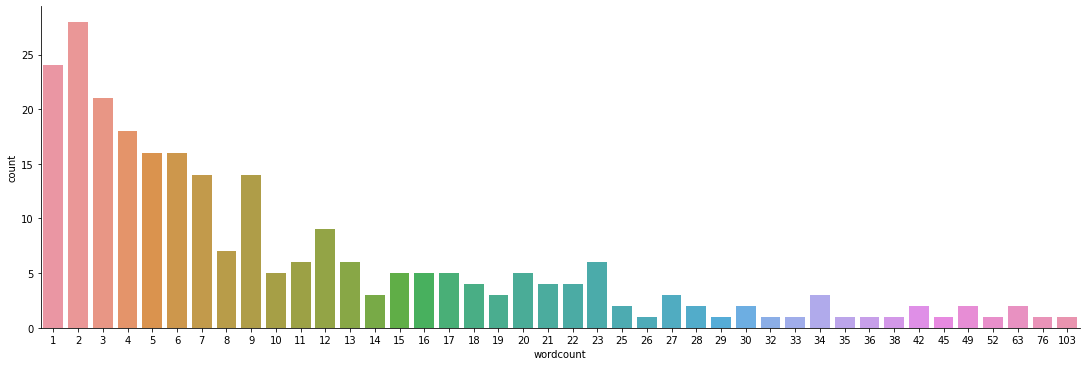

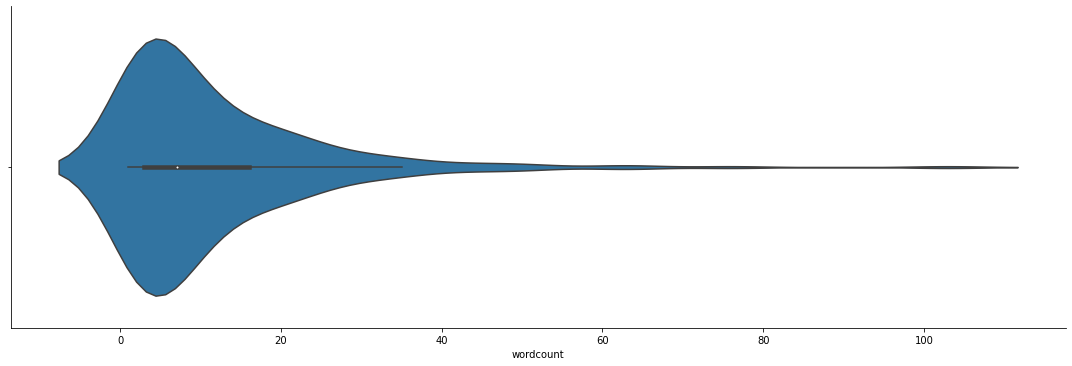

In [ ]:
sb.catplot(x = 'wordcount', data = dataframe, kind = 'count', aspect = 3); #Barras
sb.catplot(x = 'wordcount', data = dataframe, kind = 'violin', aspect = 3); #Gráfica de violín: Muestra la distribución.

In [ ]:
X = dataframe[['wordcount','sentimentValue']].values # X Mayus para características.
y = dataframe['Star Rating'].values # y respuesta.

In [ ]:
#Dividir entre entrenamiento y test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4) # test_size porcentaje para datos de entrenamiento. Random_state tomar siempre el mismo grupo de entrenamiento test.
print(np.max(X_train[:,0]))
print(np.min(X_train[:,0]))
print(np.max(X_test[:,0]))
print(np.min(X_test[:,0]))

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(scaler.data_max_)
print(scaler.data_min_)
# MinMax sensible a datos atípicos. Elimina toda la variabilidad de la columna.

103.0
1.0
63.0
1.0
[103.           2.92439309]
[ 1.         -2.27646903]


In [ ]:
n_neighbors = 18
knn = KNeighborsClassifier(n_neighbors) #crear el modelo

#Entrenar el modelo
knn.fit(X_train, y_train)
print('Accuracy en entrenamiento: {:.2f}'.format(knn.score(X_train, y_train)))

print('Accuracy en test: {:.2f}'.format(knn.score(X_test, y_test)))


Accuracy en entrenamiento: 0.86
Accuracy en test: 0.87


In [ ]:
#Predicciones
pred = knn.predict(X_test)
print(confusion_matrix(y_test,pred)) #precision se mira por columnas(lo que el modelo dice), recall se mira por filas(los datos reales).

[[ 6  0  2  0  0]
 [ 0  2  1  0  0]
 [ 0  1 16  0  0]
 [ 0  1  0  3  2]
 [ 0  0  0  0 18]]


In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       1.00      0.75      0.86         8
           2       0.50      0.67      0.57         3
           3       0.84      0.94      0.89        17
           4       1.00      0.50      0.67         6
           5       0.90      1.00      0.95        18

    accuracy                           0.87        52
   macro avg       0.85      0.77      0.79        52
weighted avg       0.88      0.87      0.86        52



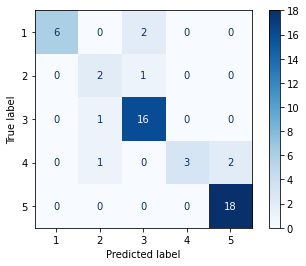

In [ ]:
plot_confusion_matrix(knn, X_test, y_test, cmap = plt.cm.Blues)

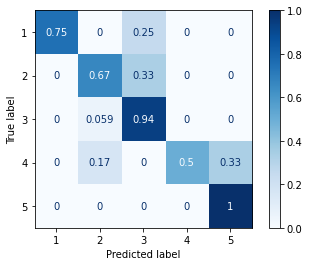

In [ ]:
plot_confusion_matrix(knn, X_test, y_test, cmap = plt.cm.Blues, normalize = 'true')
plt.savefig('matrixconf.pdf', transparent = True)

Text(0, 0.5, 'Sentiment Value')

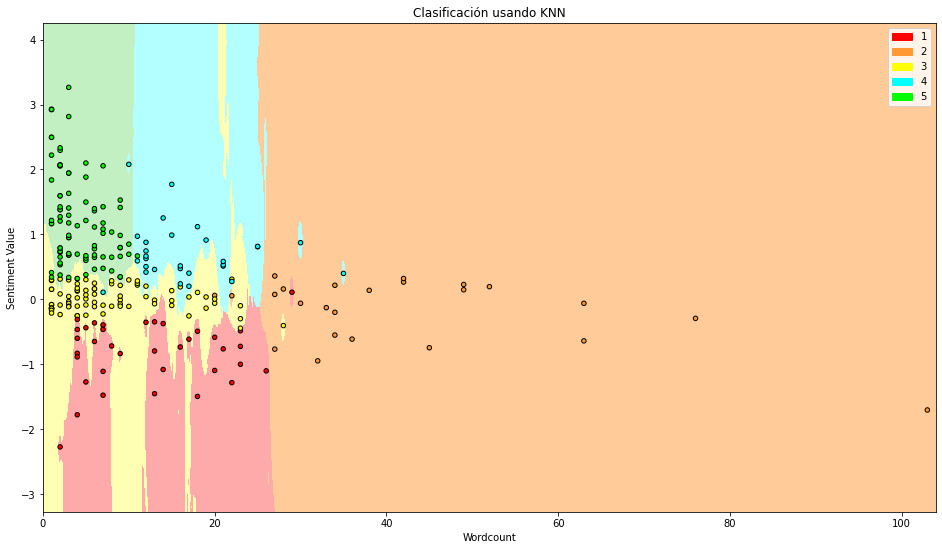

In [ ]:
h = 0.02
cmap_light = ListedColormap(['#FFAAAA','#FFCC99','#FFFFB3','#B3FFFF','#C2F0C2'])
cmap_bold = ListedColormap(['#FF0000','#FF9933','#FFFF00','#00FFFF','#00FF00'])
clf = KNeighborsClassifier(n_neighbors, weights = 'distance') # Se crea un nuevo modelo. Ponderar en función de la distancia, no en función de mayorias.
clf.fit(X,y) #Entrenamiento.
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1 
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1 

#Crear grillas de valores con numpy.
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize = (16,9))
plt.pcolormesh(xx,yy,Z, cmap = cmap_light);
plt.scatter(X[:,0],X[:,1],c = y, cmap = cmap_bold, edgecolor = 'k' , s = 20);
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
patch0 = mpatches.Patch(color = '#FF0000', label = '1')
patch1 = mpatches.Patch(color = '#FF9933', label = '2')
patch2 = mpatches.Patch(color = '#FFFF00', label = '3')
patch3 = mpatches.Patch(color = '#00FFFF', label = '4')
patch4 = mpatches.Patch(color = '#00FF00', label = '5')

plt.legend(handles = [patch0, patch1, patch2, patch3, patch4])
plt.title('Clasificación usando KNN')
plt.xlabel('Wordcount')
plt.ylabel('Sentiment Value')

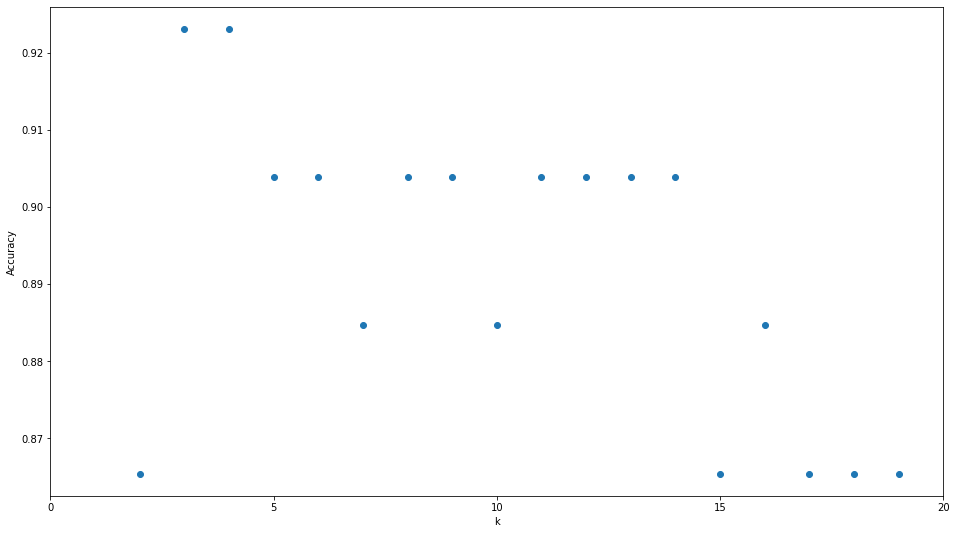

In [ ]:
#probar diferentes valores de k.
k_range = range(2,20)
scores = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train, y_train)
  scores.append(knn.score(X_test, y_test))

plt.figure(figsize = (16,9))
plt.scatter(k_range, scores)
plt.xlabel('k');
plt.ylabel('Accuracy');
plt.xticks([0,5,10,15,20]);

In [ ]:
#Según la gráfica anterior el k más optimo es el 3.
n_neighbors = 3
knn = KNeighborsClassifier(n_neighbors) #crear el modelo

#Entrenar el modelo
knn.fit(X_train, y_train)
print('Accuracy en entrenamiento: {:.2f}'.format(knn.score(X_train, y_train)))

print('Accuracy en test: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy en entrenamiento: 0.94
Accuracy en test: 0.92


In [ ]:
#Hay sesgo de la k para los datos de test. 
print(knn.predict([[5,1],[1,4]]))
#ERROR: Antes de hacer la predicción hay que estandarizar los datos. (min,max)

[2 5]


In [ ]:
print(knn.predict(scaler.transform([[5,1],[1,4]])))

[5 5]


In [ ]:
#En funcion de probabilidades.
print(knn.predict_proba(scaler.transform([[20,0]])))

[[0.         0.33333333 0.66666667 0.         0.        ]]


In [ ]:
#Validación cruzada para identificar correctamente el valor de k, solo con los datos de entrenamiento.
parameters = {'n_neighbors' : range(3,20), 'p' : range(2,10)} 

knn = KNeighborsClassifier()
clf = GridSearchCV(knn, param_grid = parameters, cv = 5) 
clf.fit(X_train, y_train)
#Imprimir k y p óptimos.
print('Mejores parámetros:', clf.best_params_)
   

Mejores parámetros: {'n_neighbors': 4, 'p': 2}


In [ ]:
#Entrenar con los mejores parámetros:
knn = KNeighborsClassifier(n_neighbors = 4, p = 2)
knn.fit(X_train, y_train)
print('Accuracy en train:{:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy en test:{:.2f}'.format(clf.score(X_test, y_test)))

Accuracy en train:0.91
Accuracy en test:0.92
